In [1]:
import pandas as pd
from rdkit import Chem

In [2]:
# Load csv file and convert it to a smi file 

df = pd.read_csv('generated_molecules_1500_charged_3_embedding.csv')

df['SMILES'].to_csv('generated_molecules_1500_charged_3_embedding.smi', index=False, header=False)


In [3]:
# Load the both smi files into list and compare them

with open('generated_molecules_1500_charged_3_embedding.smi') as f:
    generated_molecules = f.readlines()

with open('converted_1500.smi') as f:
    converted_molecules = f.readlines()


In [4]:
# Remove the \n and \t from the list

generated_molecules = [x.strip() for x in generated_molecules]
converted_molecules = [x.strip() for x in converted_molecules]


In [5]:
import networkx as nx
from rdkit import Chem
from networkx.algorithms import isomorphism

from rdkit.Chem import SanitizeMol, SANITIZE_ALL

def mol_to_nx(mol):

    # Test if the molecule is valid
    


    G = nx.Graph()

    for atom in mol.GetAtoms():
        if atom.GetSymbol() != "H":
            G.add_node(atom.GetIdx(),
                       atomic_num=atom.GetAtomicNum(),
                       formal_charge=atom.GetFormalCharge())

    for bond in mol.GetBonds():
        if bond.GetBeginAtom().GetSymbol() != "H" and bond.GetEndAtom().GetSymbol() != "H":
            G.add_edge(bond.GetBeginAtom().GetIdx(),
                       bond.GetEndAtom().GetIdx(),
                       bond_type=bond.GetBondType())

    return G


def compare_mols(mol1, mol2):
    G1 = mol_to_nx(mol1)
    G2 = mol_to_nx(mol2)

    GM = isomorphism.GraphMatcher(G1, G2,
                                  node_match=isomorphism.categorical_node_match(['atomic_num', 'formal_charge'], [-1, -1]),
                                  edge_match=isomorphism.categorical_edge_match(['bond_type'], [None]))

    if GM.is_isomorphic():
        return True, None
    else:
        unmatched_nodes_G1 = [node for node in G1.nodes(data=True) if node not in G2.nodes(data=True)]
        unmatched_nodes_G2 = [node for node in G2.nodes(data=True) if node not in G1.nodes(data=True)]
        
        unmatched_edges_G1 = [edge for edge in G1.edges(data=True) if edge not in G2.edges(data=True)]
        unmatched_edges_G2 = [edge for edge in G2.edges(data=True) if edge not in G1.edges(data=True)]
        
        return False, {'unmatched_nodes_G1': unmatched_nodes_G1,
                       'unmatched_nodes_G2': unmatched_nodes_G2,
                       'unmatched_edges_G1': unmatched_edges_G1,
                       'unmatched_edges_G2': unmatched_edges_G2}

In [30]:
num_valid = 0
list_really_not_valid = []
complete_list = []
for i in range(len(generated_molecules)):
    # Check if the molecule is valid
    mol = Chem.MolFromSmiles(generated_molecules[i], sanitize = False)
    try:
        Chem.SanitizeMol(mol, sanitizeOps=SANITIZE_ALL)
    except ValueError:
        mol1 = Chem.MolFromSmiles(generated_molecules[i], sanitize = False)
        mol2 = Chem.MolFromSmiles(converted_molecules[i])

        if mol2 is not None:
            is_isomorphic, unmatched = compare_mols(mol1, mol2)
            if is_isomorphic:
                num_valid += 1
                complete_list.append(Chem.MolToSmiles(mol2))
            else:
                list_really_not_valid.append(i)
                complete_list.append(generated_molecules[i])
        else:
            list_really_not_valid.append(i)
            complete_list.append(generated_molecules[i])
    else:
        num_valid += 1
        complete_list.append(generated_molecules[i])

        continue

print('Number of valid molecules: ', num_valid/len(generated_molecules))
    


[15:10:56] non-ring atom 0 marked aromatic
[15:10:56] Explicit valence for atom # 2 C, 5, is greater than permitted
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 9 10 13 14 15 16 17 18 19
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 23
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 11 12 20 21 23 25
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 16 18
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 1 2 16
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 3 4 5 25 26
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 22 23 24
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22
[15:10:56] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 

Number of valid molecules:  0.9606666666666667


[15:10:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 13 15 16 17 18 19 20 21 22 23 26 27 28
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 16
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 19 20 21 28 29
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 22 23 24 25 26
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 31 32 33
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 12 15
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 9 11 14 15 16 17 18
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 16 17 18 20 23
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 35 36 37 38 39
[15:10:57] Explicit valence for atom # 37 C, 5, is greater than permitted
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 8 9 10 11 13 14
[15:10:57] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 8 10 1

In [33]:
# Save complete list to csv file

df = pd.DataFrame(complete_list, columns=['SMILES'])
df.to_csv('generated_molecules_1500_charged_3_embedding_post_treatment.csv', index=False)

In [13]:
print(converted_molecules[34])
print(generated_molecules[34])

O=C(c1cc(c2ccon2)cs1)N1CCN2C(ONC2=O)C1
O=C(c1cc(-c2ccon2)cs1)N1CCn2c(onc2=O)C1


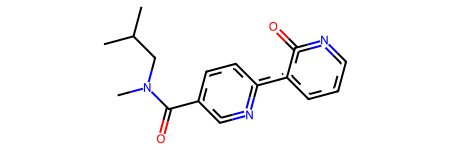

In [28]:
Chem.MolFromSmiles(generated_molecules[889], sanitize = False)

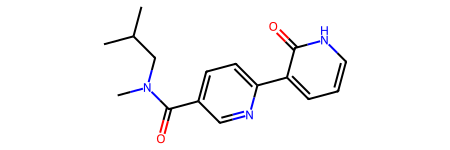

In [29]:
Chem.MolFromSmiles(converted_molecules[889])

In [10]:
list_really_not_valid

[2,
 26,
 34,
 50,
 89,
 93,
 144,
 155,
 197,
 235,
 239,
 282,
 324,
 325,
 326,
 340,
 388,
 397,
 405,
 447,
 460,
 466,
 486,
 518,
 525,
 533,
 551,
 562,
 582,
 584,
 612,
 619,
 681,
 699,
 701,
 711,
 729,
 735,
 738,
 787,
 794,
 796,
 889,
 944,
 961,
 980,
 1047,
 1067,
 1072,
 1080,
 1131,
 1133,
 1151,
 1198,
 1221,
 1231,
 1294,
 1295,
 1442]

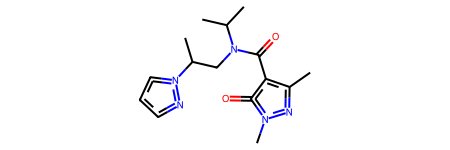

In [ ]:
Chem.MolFromSmiles('Cc1nn(C)c(=O)c1C(=O)N(CC(C)n1cccn1)C(C)C', sanitize = False)

In [ ]:
num_valid = 0
for mol in converted_molecules:
    if mol in generated_molecules:
        num_valid += 1
    elif transform_smiles_H(mol) in generated_molecules:
        num_valid += 1

C=C[C](=O)=NN=CC=CC=CC=CC=CC=CC=CN=C(N=CN=CC=CC=CC=C(C)C=C1[C]2=NC(=CC=CC=2CC(C)C1)C)N1CCCCC1
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
C=C(C)C=NC=CC=C(C)C=CC=CC=Cc1ccccc1N=NC=CC=CN=CC=C1C=Cc2cc(C)nc3c2C1N=[N]3CNc1ccccc1
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
C=CC=CC=CC=CC=CC=CC=CC=CC(=Nc1ccccc1N(c1ccccc1)[C](=O)=[N](c1ccccc1C#N)c1nnc(C)n1CC)C
new
new
new
new
C=CC=CC=CC=CC=CC=CC=CC=CCc1ccccc1C=C(C)C=CC1=C(N=c2nc3[C](=O)=[O]C(=n2c2ccccc32)C)OC(C)C(=O)N1
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new


[12:22:27] Explicit valence for atom # 2 C, 5, is greater than permitted
[12:22:27] Explicit valence for atom # 43 N, 4, is greater than permitted
[12:22:28] Explicit valence for atom # 31 C, 5, is greater than permitted
[12:22:28] Explicit valence for atom # 34 C, 5, is greater than permitted
[12:22:28] Explicit valence for atom # 37 C, 5, is greater than permitted


In [ ]:
num_valid / len(converted_molecules)

0.89